<a href="https://colab.research.google.com/github/skgag1216/deep-learning-challenge/blob/main/Charity_Opt_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv
# Note: upload charity_data.csv to files in google colab
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Dropping two columns will reduce the df from 12 to 10 columns
# The target is the IS_SUCCESSFUL column and the other 9 columns are the dimensions
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)


In [ ]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_df['APPLICATION_TYPE'].value_counts() [application_df['APPLICATION_TYPE'].value_counts() < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# *** Starter Code DO NOT RUN this line ***
# You may find it helpful to look at CLASSIFICATION value counts >1


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C1260        3
C2710        3
C1234        2
C1246        2
C1267        2
C3200        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classification_types_to_replace`
classification_types_to_replace = list(classification_count[classification_count<200].index)
classification_types_to_replace

['C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [ ]:
# Replace in dataframe
for cls in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(application_df)
numeric_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays

y = numeric_df["IS_SUCCESSFUL"]
X = numeric_df.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Step 2: Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_node_layer1 =  70
hidden_node_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_node_layer1, input_dim=input_features , activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                3220      
                                                                 
 dense_1 (Dense)             (None, 30)                2130      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,381
Trainable params: 5,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5726 - accuracy: 0.7166
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7279
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7317
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7316
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7328
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5449 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5540 - accuracy: 0.7287 - 478ms/epoch - 2ms/step
Loss: 0.5540475845336914, Accuracy: 0.7287463545799255


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

## Step 3: Optimize the Model 

In [ ]:
input_features = len(X_train_scaled[0])
hidden_node_layer1 =  10
hidden_node_layer2 = 20
hidden_node_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_node_layer1, input_dim=input_features , activation='tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2, activation='tanh'))

# Third
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                460       
                                                                 
 dense_8 (Dense)             (None, 20)                220       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5862 - accuracy: 0.7053
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5582 - accuracy: 0.7270
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5494 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7316
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5470 - accuracy: 0.7340
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5466 - accura

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5514 - accuracy: 0.7287 - 917ms/epoch - 3ms/step
Loss: 0.5513967871665955, Accuracy: 0.7287463545799255


In [ ]:
input_features = len(X_train_scaled[0])
hidden_node_layer1 =  10
hidden_node_layer2 = 20
hidden_node_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_node_layer1, input_dim=input_features , activation='tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2, activation='tanh'))

# Third
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                460       
                                                                 
 dense_12 (Dense)            (None, 20)                220       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5808 - accuracy: 0.7088
Epoch 2/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5585 - accuracy: 0.7267
Epoch 3/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5544 - accuracy: 0.7274
Epoch 4/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.7300
Epoch 5/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5512 - accuracy: 0.7287
Epoch 6/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7302
Epoch 7/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7296
Epoch 8/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7299
Epoch 9/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7306
Epoch 10/80
804/804 [==============================] - 3s 3ms/step - loss: 0.5479 - accuracy: 0.7299

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5531 - accuracy: 0.7292 - 774ms/epoch - 3ms/step
Loss: 0.5531133413314819, Accuracy: 0.7292128205299377


## Step 4: Write a Report on the Neural Network Model

*Overview of the analysis: Explain the purpose of this analysis.*

The purpose of this analysis is to find out if we can use machine learning, a deep learning model such as a neural network, to come to a reliable prediction of whether or not the nonprofit AlphabetSoup should provide funding to a charity based on the charity's success.

*Results: Using bulleted lists and images to support your answers, address the following questions.*

*Data Preprocessing*

*What variable(s) are the target(s) for your model?*

The target is the IS_SUCCESSFUL column of the data

*What variable(s) are the features for your model?*

We remove unnecessary columns such as EIN and NAME. The remaining columns make up our features. APPLICATION_TYPE	CLASSIFICATION		ORGANIZATION	STATUS	INCOME_AMT	SPECIAL_CONSIDERATIONS	ASK_AMT

*What variable(s) should be removed from the input data because they are neither targets nor features?*

Also, possibly USE_CASE and AFFILIATION could be removed (I would do this in a future test!) 

*Compiling, Training, and Evaluating the Model*

*How many neurons, layers, and activation functions did you select for your neural network model, and why?*

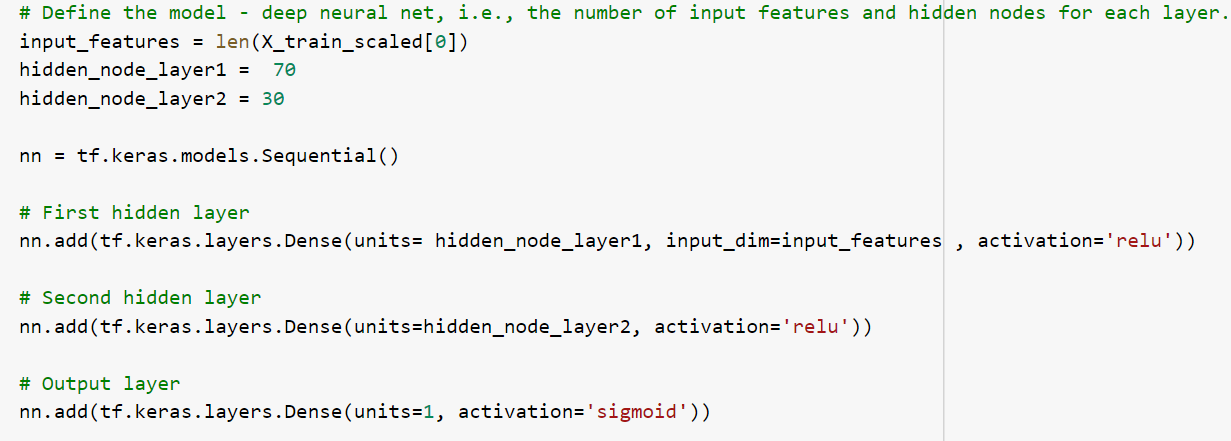

*Were you able to achieve the target model performance?*

I was not able to achieve the performace I was looking for (75% accuracy) for the first test. Here are my results:
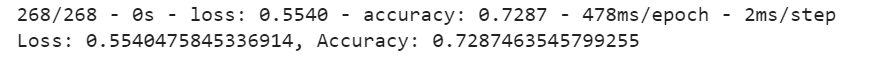

*What steps did you take in your attempts to increase model performance?*

In order to increase the model's performance (I went thru 2 rounds of optimizations) I ultimately decreased the number associated with each hidden node but increased the layers. I decided to try different activation functions as well, trying tanh added in with my already performing relu and kept outcome set with sigmoid. I was able to see a teeny tiny improvement toward the goal.

*Summary: Summarize the overall results of the deep learning model. Include a recommendation for how a different model could solve this classification problem, and then explain your recommendation.*

The deep learning model takes a lot of experimentation. I feel like it is ALL EXPERIMENTATION. The results prove that we could work towards a goal of an outcome that we are looking for but this particular model does not guarantee it. I would suggest trying a different model in the future. I think a logistic regression or random forest may be better suited for this type of data since we have the IS_SUCCESSFUL column to work with which gives us our classes.